# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Business Problem

# Data Collection and Analysis

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
#Previewing the dataset
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
419,63,female,26.980,0,yes,northwest,28950.46920
411,44,female,20.235,1,yes,northeast,19594.80965
790,39,female,41.800,0,no,southeast,5662.22500
1201,46,male,40.375,2,no,northwest,8733.22925
35,19,male,20.425,0,no,northwest,1625.43375


In [5]:
#Getting number of rows and columns
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#General information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Descriptive statisticals about the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df=df.astype({'age':np.int16, 'bmi':np.int16, 'children':np.int16,'charges':np.single})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int16  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   int16  
 3   children  1338 non-null   int16  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float32
dtypes: float32(1), int16(3), object(3)
memory usage: 44.6+ KB


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27,0,yes,southwest,16884.923828
1,18,male,33,1,no,southeast,1725.552246
2,28,male,33,3,no,southeast,4449.461914
3,33,male,22,0,no,northwest,21984.470703
4,32,male,28,0,no,northwest,3866.855225


In [13]:
#Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
#Checking Duplicates
df.duplicated().sum()

1

In [15]:
df=df.drop_duplicates()
df.shape

(1337, 7)

# Data Analysis

In [16]:
#finding outliers
def findoutlier(column):
    outliers=[]
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    for val in column:
        if val>upper or val<lower:
            outliers.append(val)
            
    return np.array(outliers)

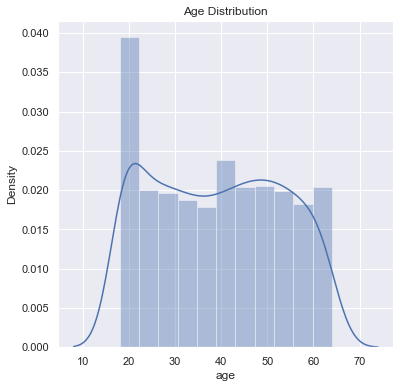

In [17]:
#Distribution of Age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [18]:
print(len(findoutlier(df.age)))

0


In [19]:
print('Skewness of age: ',stats.skew(df.age))
print('Kurtosis of age: ',stats.kurtosis(df.age))

Skewness of age:  0.054719294607049676
Kurtosis of age:  -1.2442418566306097


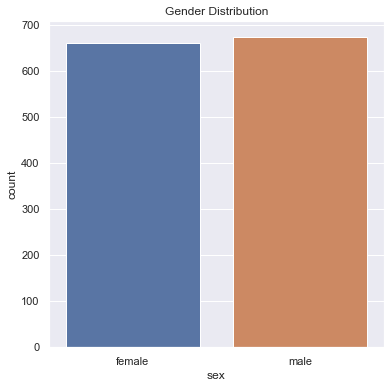

In [20]:
#Gender 
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title("Gender Distribution")
plt.show()

In [21]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

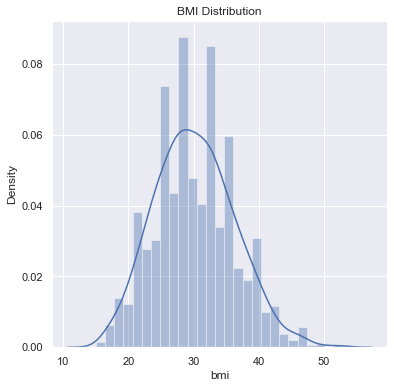

In [22]:
#Distribution of BMI
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

In [23]:
print(len(findoutlier(df.bmi)))

9


<AxesSubplot:xlabel='bmi'>

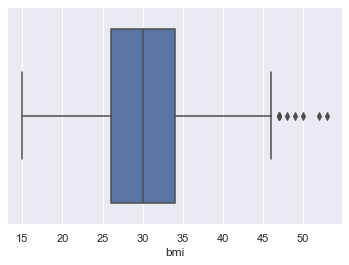

In [24]:
sns.boxplot(df.bmi)

In [25]:
print('Skewness of age: ',stats.skew(df.bmi))
print('Kurtosis of age: ',stats.kurtosis(df.bmi))

Skewness of age:  0.2816421944759746
Kurtosis of age:  -0.06026862464222482


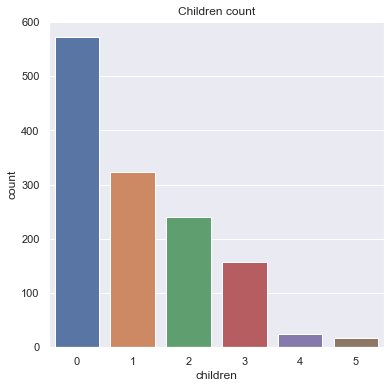

In [26]:
#Children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children count')
plt.show()

In [27]:
print('Skewness of age: ',stats.skew(df.children))
print('Kurtosis of age: ',stats.kurtosis(df.children))

Skewness of age:  0.9363686100859417
Kurtosis of age:  0.19571940948273436


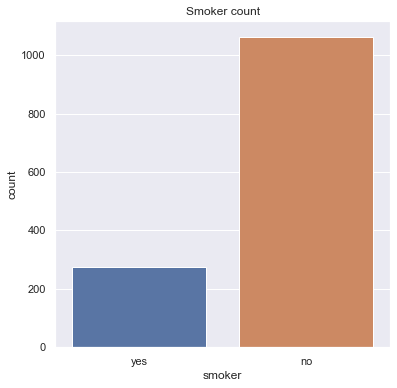

In [28]:
#Smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker count')
plt.show()

In [29]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

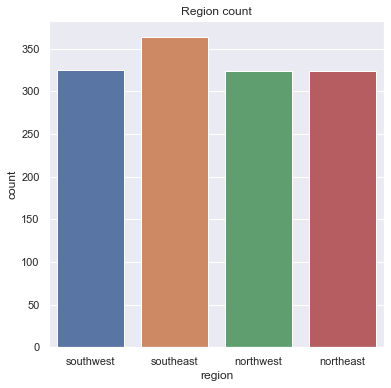

In [30]:
#Region
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region count')
plt.show()

In [31]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [32]:
print('Skewness of age: ',stats.skew(df.age))
print('Kurtosis of age: ',stats.kurtosis(df.age))

Skewness of age:  0.054719294607049676
Kurtosis of age:  -1.2442418566306097


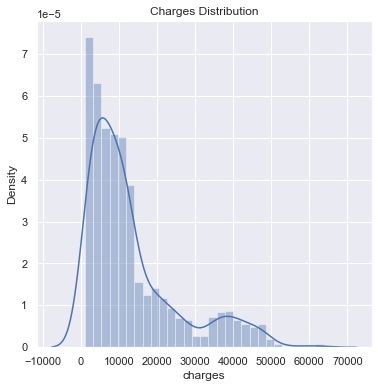

In [33]:
#Distribution of Charges
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [34]:
print(len(findoutlier(df.charges)))

139


In [35]:
print('Skewness of age: ',stats.skew(df.charges))
print('Kurtosis of age: ',stats.kurtosis(df.charges))

Skewness of age:  1.5136901140213013
Kurtosis of age:  1.5937434299112114


# Data PreProcessing

### Encoding categorical variables

In [36]:
df.replace({'sex':{'male':0,'female':1},'smoker':{'yes':0,'no':1}},inplace=True)

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27,0,0,southwest,16884.923828
1,18,0,33,1,1,southeast,1725.552246
2,28,0,33,3,1,southeast,4449.461914
3,33,0,22,0,1,northwest,21984.470703
4,32,0,28,0,1,northwest,3866.855225


In [38]:
corr=df.corrwith(df.charges)
corr

age         0.298308
sex        -0.058044
bmi         0.196236
children    0.067389
smoker     -0.787234
charges     1.000000
dtype: float64

<AxesSubplot:>

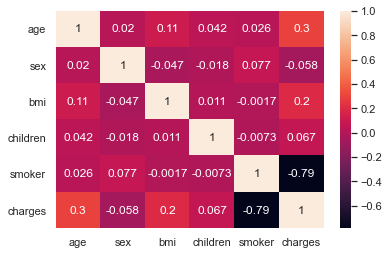

In [39]:
sns.heatmap(df.corr(),annot=True)

In [40]:
df=df.drop(['region'],axis=1)

In [41]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27,0,0,16884.923828
1,18,0,33,1,1,1725.552246
2,28,0,33,3,1,4449.461914
3,33,0,22,0,1,21984.470703
4,32,0,28,0,1,3866.855225


## Splitting the features and Target

In [42]:
X=df.drop(columns='charges',axis=1)
y=df['charges']

In [43]:
print(X)

      age  sex  bmi  children  smoker
0      19    1   27         0       0
1      18    0   33         1       1
2      28    0   33         3       1
3      33    0   22         0       1
4      32    0   28         0       1
...   ...  ...  ...       ...     ...
1333   50    0   30         3       1
1334   18    1   31         0       1
1335   18    1   36         0       1
1336   21    1   25         0       1
1337   61    1   29         0       0

[1337 rows x 5 columns]


In [44]:
print(y)

0       16884.923828
1        1725.552246
2        4449.461914
3       21984.470703
4        3866.855225
            ...     
1333    10600.547852
1334     2205.980713
1335     1629.833496
1336     2007.944946
1337    29141.359375
Name: charges, Length: 1337, dtype: float32


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [46]:
y_train

435     13919.823242
202     13012.208984
1183     9447.382812
1291    34828.652344
773     17748.505859
            ...     
716      9566.991211
906      4846.919922
1097     1674.632324
235     19444.265625
1062    48970.246094
Name: charges, Length: 1069, dtype: float32

In [47]:
scaler=MinMaxScaler()

In [48]:
X_train=scaler.fit_transform(X_train)

In [49]:
X_test=scaler.transform(X_test)
X_test.shape

(268, 5)

## Model Training

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report

In [51]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

In [52]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

## Model Evaluation

In [53]:
y_pred_lr1=lr.predict(X_train)
y_pred_lr2=lr.predict(X_test)
r2_lr1 = metrics.r2_score(y_train,y_pred_lr1)
r2_lr2 = metrics.r2_score(y_test,y_pred_lr2)
mse_lr=mean_squared_error(y_test,y_pred_lr2)
print('Train accuracy :',r2_lr1,'\nTest Accuracy : ',r2_lr2)
print("MSE : ",mse_lr)

NameError: name 'metrics' is not defined

In [ ]:
y_pred_dt1=dt.predict(X_train)
y_pred_dt2=dt.predict(X_test)
r2_dt1 = metrics.r2_score(y_train,y_pred_dt1)
r2_dt2 = metrics.r2_score(y_test,y_pred_dt2)
mse_dt=mean_squared_error(y_test,y_pred_dt2)
print('Train accuracy :',r2_dt1,'\nTest Accuracy : ',r2_dt2)
print("MSE : ",mse_dt)

In [ ]:
y_pred_rf1=rf.predict(X_train)
y_pred_rf2=rf.predict(X_test)
r2_rf1 = metrics.r2_score(y_train,y_pred_rf1)
r2_rf2 = metrics.r2_score(y_test,y_pred_rf2)
mse_rf=mean_squared_error(y_test,y_pred_rf2)
print('Train accuracy :',r2_rf1,'\nTest Accuracy : ',r2_rf2)
print("MSE : ",mse_rf)

In [ ]:
y_pred_knn1=knn.predict(X_train)
y_pred_knn2=knn.predict(X_test)
r2_knn1 = metrics.r2_score(y_train,y_pred_knn1)
r2_knn2 = metrics.r2_score(y_test,y_pred_knn2)
mse_knn=mean_squared_error(y_test,y_pred_knn2)
print('Train accuracy :',r2_knn1,'\nTest Accuracy : ',r2_knn2)
print("MSE : ",mse_knn)

In [ ]:
y_pred_gbr1=gbr.predict(X_train)
y_pred_gbr2=gbr.predict(X_test)
r2_gbr1 = metrics.r2_score(y_train,y_pred_gbr1)
r2_gbr2 = metrics.r2_score(y_test,y_pred_gbr2)
mse_gbr=mean_squared_error(y_test,y_pred_gbr2)
print('Train accuracy :',r2_gbr1,'\nTest Accuracy : ',r2_gbr2)
print("MSE : ",mse_gbr)

In [ ]:
models=['LR','DT','RF','KNN','GBR']
train_acc=[r2_lr1,r2_dt1,r2_rf1,r2_knn1,r2_gbr1]
test_acc=[r2_lr2,r2_dt2,r2_rf2,r2_knn2,r2_gbr2]
mse=[mse_lr,mse_dt,mse_rf,mse_knn,mse_gbr]

In [ ]:
sns.barplot(models,train_acc,color='b')
sns.barplot(models,test_acc,color='y')
plt.title('Accuracies')
plt.show()

In [ ]:
sns.barplot(models,mse,color='b')
plt.title('MSE')
plt.show()

In [ ]:
gbr_score=cross_val_score(gbr,X_train,y_train,cv=10)
gbr_score

In [ ]:
cv_score=gbr_score.mean().round(5)*100
print("Mean Score:",cv_score,'%')

In [ ]:
input=[26,1,35,1,0]
input=np.asarray(input).reshape(1,-1)

In [ ]:
input

In [ ]:
predict=gbr.predict(input)
predict[0]

In [ ]:
gbr=gbr.fit(X,y)

In [ ]:
predict=gbr.predict(input)
predict[0]

In [ ]:
df.columns

In [54]:
X=df.drop(['charges'],axis=1)
X.head()

,age,sex,bmi,children,smoker
0,19,1,27,0,0
1,18,0,33,1,1
2,28,0,33,3,1
3,33,0,22,0,1
4,32,0,28,0,1


In [55]:
y=df['charges']
y.head()

0    16884.923828
1     1725.552246
2     4449.461914
3    21984.470703
4     3866.855225
Name: charges, dtype: float32

In [56]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [57]:
grb=GradientBoostingRegressor()

In [58]:
regressor=gbr.fit(X,y)

In [64]:
gbr.predict([[19,1,27,0,0]])

array([57896.83129202])